# EECS 491: Probabilistic Graphical Models Assignment 4
**David Fan**

4/11/18

# Exercise 3

In this notebook we will utilize PCA to compute the principle components of the MNIST dataset.

First let us load in the MNIST dataset:

In [16]:
import gzip, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [17]:
with gzip.open('data/mnist.pkl.gz', 'rb') as f:
    f = pickle._Unpickler(f)
    f.encoding = 'latin1'
    trainSet, validSet, testSet = f.load()
    mnistData = np.concatenate((trainSet[0], validSet[0], testSet[0]), axis=0)

The following is a function taken from the demo that displays a number of image samples from a given dataset:

In [18]:
def showImageSamples(imageset, n, shape=[28,28], col=3, width=16, dispopt='gray', random=True):
    row    = np.ceil(n / col)
    height = np.around(row * (width / col))
    plt.figure(figsize=(width, height))
    subplotIndex = 100 * row + 10 * col + 1
    for i in range(n):
        if random:
            img = imageset[np.random.randint(len(imageset), size=1)]
        else:
            img = imageset[i]
        plt.subplot(subplotIndex + i)
        plt.imshow(img.reshape(shape), cmap=dispopt)

We will use it to display 9 images from the MNIST dataset:

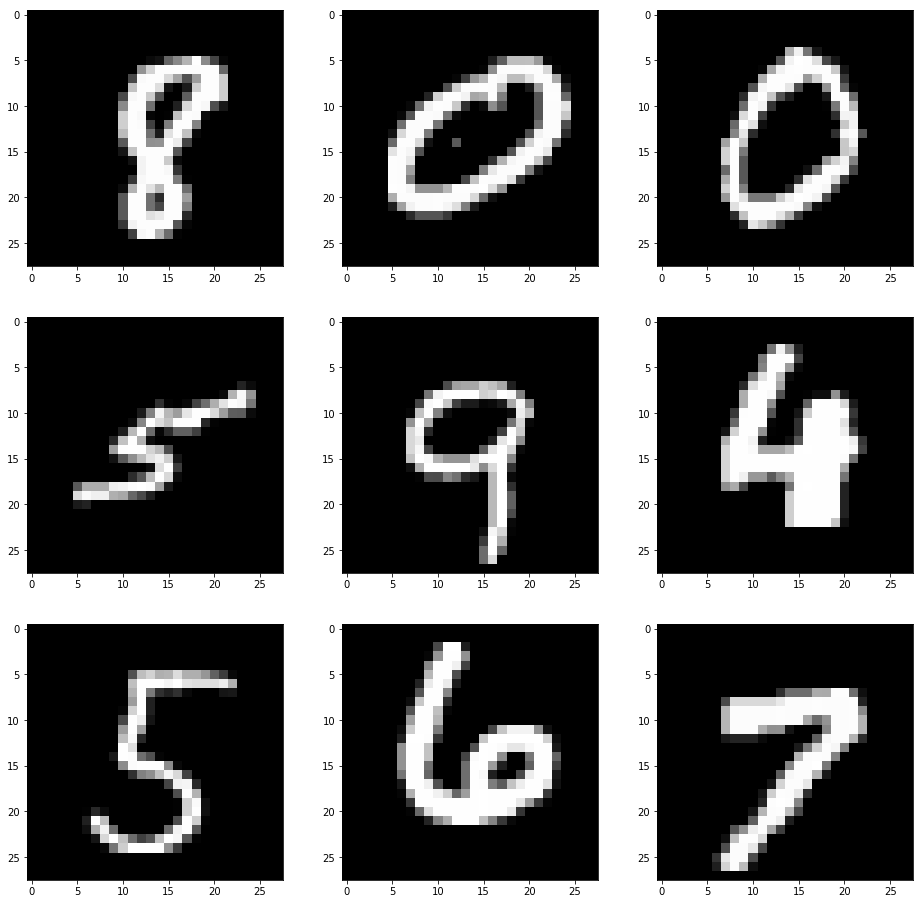

In [19]:
showImageSamples(mnistData, 9)

Now let us implement a function that will reduce the dimensionality of a given dataset using PCA, and return the eigenvectors and eigenvalues of the covariance matrix of the dataset:

In [20]:
def dimReducePCA(data, dims):
    pca = PCA(n_components=dims)
    reduced_data = pca.fit_transform(data)
    pca = PCA()
    pca.fit(data)
    eigen_vectors = pca.components_.T
    eigen_values = pca.explained_variance_
    return reduced_data, eigen_vectors, eigen_values 

Let's call that function on the MNIST dataset:

In [23]:
mnistData2D, eigenVectors, eigenValues = dimReducePCA(mnistData, 2)

Now, using the eigenvectors returned, let's show the first few primary components of MNIST:

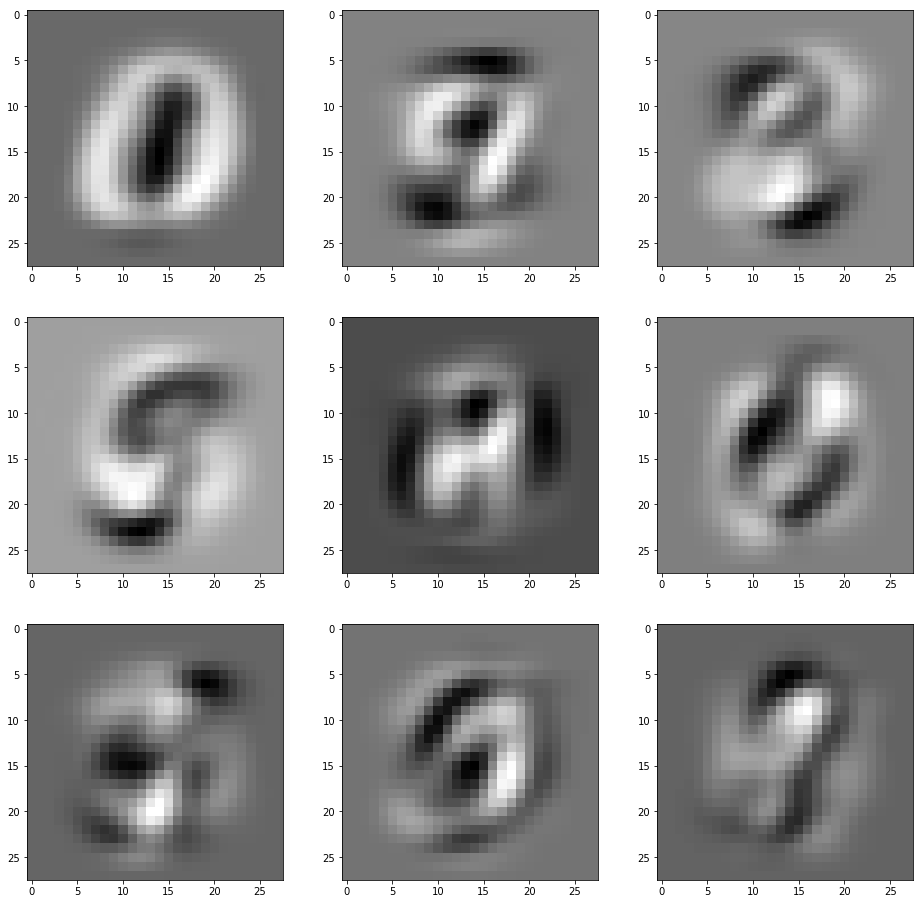

In [22]:
showImageSamples(eigenVectors.T, 9, random=False)

In the next exercise, we will use this dimension reduced MNIST dataset to train a Gaussian Mixture Model.